# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [63]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0   163k      0 --:--:-- --:--:-- --:--:--  166k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  53530      0 --:--:-- --:--:-- --:--:-- 54692


In [64]:
# Take a peek at the datasets
import pandas as pd
pd.read_csv('train.dat', sep='\s+', nrows=10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
1,1,0,0,0,0,0,0,1,1,0,0,1,0
0,0,1,1,0,1,1,0,0,0,0,0,1,0
0,1,0,1,1,0,1,0,1,1,1,0,1,1
0,0,1,0,0,1,0,1,0,1,1,1,1,0
0,1,0,0,0,0,0,1,1,1,1,1,1,0
0,1,1,1,0,0,0,1,0,1,1,0,1,1
0,1,1,0,0,0,1,0,0,0,0,0,1,0
0,0,0,1,1,0,1,1,1,0,0,0,1,0
0,0,0,0,0,0,1,0,1,0,1,0,1,0
1,0,1,1,1,0,0,0,1,1,1,0,1,1


In [65]:
pd.read_csv('test.dat', sep='\s+', nrows=10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
1,1,1,1,0,0,1,1,0,0,0,1,1,0
0,0,0,1,0,0,1,1,0,1,0,0,1,0
0,1,1,1,0,1,1,1,1,0,0,0,1,0
0,1,1,0,1,0,1,1,1,0,1,0,1,0
0,1,0,0,0,1,0,1,0,1,0,0,1,0
0,1,1,0,0,1,1,1,1,1,1,0,1,0
0,1,1,1,0,0,1,1,0,0,0,1,1,0
0,1,0,0,1,0,0,1,1,0,1,1,1,0
1,1,1,1,0,0,1,1,0,0,0,0,1,0
1,0,1,1,1,1,1,0,0,0,0,0,1,0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [66]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(x * y for (x, y) in zip(array1, array2)) 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [67]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
The first method gives more flexibility, making it easy to swap out the sigmoid function with different activation functions during the calculation.



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [68]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



#tr: 20, epochs: 2000, learning rate: 0.050; Accuracy (test, 100 instances): 60.0
#tr: 40, epochs: 2000, learning rate: 0.050; Accuracy (test, 100 instances): 52.0
#tr: 100, epochs: 2000, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 2000, learning rate: 0.050; Accuracy (test, 100 instances): 75.0
#tr: 300, epochs: 2000, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 380, epochs: 2000, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 2000, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 2000, learning rate: 0.200; Accuracy (test, 100 instances): 60.0
#tr: 40, epochs: 2000, learning rate: 0.200; Accuracy (test, 100 instances): 54.0
#tr: 100, epochs: 2000, learning rate: 0.200; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 2000, learning rate: 0.200; Accuracy (test, 100 instances): 75.0
#tr: 300, epochs: 2000, learning rate: 0.200; Accuracy (test, 100 instances): 77.0
#tr: 380

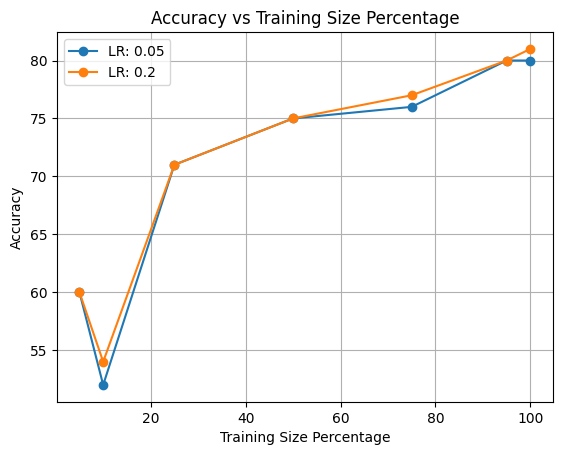

In [71]:
import matplotlib.pyplot as plt

tr_percent = [5, 10, 25, 50, 75, 95, 100]
epochs = 2000
lr_array = [0.05, 0.2]

accuracy_data = {lr: [] for lr in lr_array}

for lr in lr_array:
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]
        weights = train_perceptron(pre_instances, lr, epochs)
        accuracy = get_accuracy(weights, instances_te)
        accuracy_data[lr].append(accuracy)
        print(f"#tr: {size}, epochs: {epochs}, learning rate: {lr:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

for lr, accuracies in accuracy_data.items():
    plt.plot(tr_percent, accuracies, label=f'LR: {lr}', marker='o')

plt.xlabel('Training Size Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Size Percentage')
plt.legend()
plt.grid(True)
plt.show()


#tr: 400, epochs:    5, learning rate: 0.020; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:   10, learning rate: 0.020; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs:   20, learning rate: 0.020; Accuracy (test, 100 instances): 76.0
#tr: 400, epochs:   50, learning rate: 0.020; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  100, learning rate: 0.020; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  150, learning rate: 0.020; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  500, learning rate: 0.020; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  800, learning rate: 0.020; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 1000, learning rate: 0.020; Accuracy (test, 100 instances): 79.0


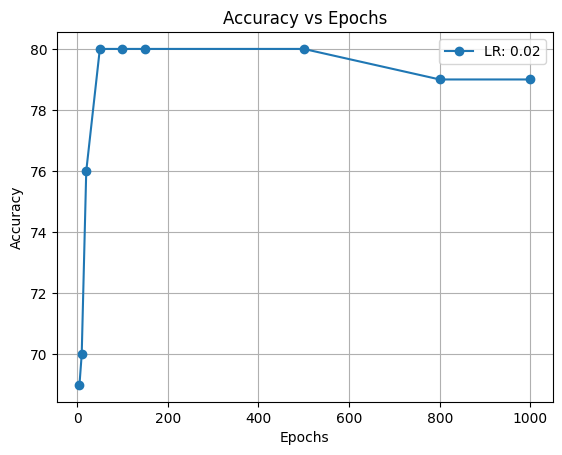

In [78]:

lr = 0.02
num_epochs = [5, 10, 20, 50, 100,150,500,800,1000]

accuracy_data = []

for epochs in num_epochs:
    weights = train_perceptron(instances_tr, lr, epochs)
    accuracy = get_accuracy(weights, instances_te)
    accuracy_data.append(accuracy)
    print(f"#tr: {len(instances_tr):3}, epochs: {epochs:4}, learning rate: {lr:.3f}; "
          f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

plt.plot(num_epochs, accuracy_data, label=f'LR: {lr}', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

A. It's not always necessary to use all the training dataset to achieve the highest accuracy on the test set. Training with a portion of the data, if the hyperparameters such as learning rate and number of epochs are adjusted properly, can also lead to the highest test set accuracy. In the graph, when epochs are 2000 and learning rate is 0.05, the accuracy is 80% for both 95% and 100% Training Size Percentage.

B. Using more training data can cause the model to overfit the training data or introduce more noise with the additional data, which affects the model's ability tgeneralize.

C. Adjusting hyperparameters can lead to higher accuracy, as shown in the graph. For example, with a training size of 400, 2000 epochs, and a learning rate of 0.2, the Accuracy reaches 81%.

D. Increasing the number of training epochs is not always worle. While it can improve model accuracy in some cases, there is also a risk of overfitting, which can decrease model accuracy. Moreover, more epochs mean longer training time




.
